# Import : in local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/[RL] TicTacToe/code/minmax_alphabeta')

In [3]:
! python environment.py
! python state.py
! python agent.py

In [4]:
from environment import TicTacToeEnvironment
from state import State
from agent import Agent

# Import : by GitHub

You can try this code in Colab by this method.  

In [1]:
!git clone https://github.com/Tonnonssi/tic_tac_toe.git

Cloning into 'tic_tac_toe'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14 (delta 0), reused 11 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 7.73 KiB | 7.73 MiB/s, done.


In [2]:
import os
os.chdir('/content/tic_tac_toe/code/minmax_alphabeta')

In [3]:
! python environment.py
! python state.py
! python agent.py

In [4]:
from environment import TicTacToeEnvironment
from state import State
from agent import Agent

# Main

In [5]:
env = TicTacToeEnvironment()
state = State()
agent_1 = Agent(env=env)
agent_2 = Agent(env=env)

# ---------
# main
# ---------


while True:
    if state.is_done():
        break

    if state.is_first_player():
        action = agent_1.alpha_beta_action(state)

    else:
        action = agent_2.random_available_action(state)

    state = state.next(action)

    print('-----')
    print(f"Action : {action}")
    env.render(state)
    print()

Available actions: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Action values: [0, 0, 0, 0, 0, 0, 0, 0, 0]
-----
Action : 7


,0,1,2
0,,,
1,,,
2,,O,



-----
Action : 0


,0,1,2
0,X,,
1,,,
2,,O,



Available actions: [1, 2, 3, 4, 5, 6, 8]
Action values: [-10, 0, 0, 0, 0, 10, 10]
-----
Action : 6


,0,1,2
0,X,,
1,,,
2,O,O,



-----
Action : 5


,0,1,2
0,X,,
1,,,X
2,O,O,



Available actions: [1, 2, 3, 4, 8]
Action values: [10, 10, 10, 10, 10]
-----
Action : 8


,0,1,2
0,X,,
1,,,X
2,O,O,O


# Extra : Time Comparison

In [6]:
import time

In [7]:
time_dict = {}

In [8]:
env = TicTacToeEnvironment()
agent_1 = Agent(env=env)
agent_2 = Agent(env=env)

## Alpha-Beta

In [10]:
state = State()

start_time = time.time()

while True:
    if state.is_done():
        total_time = time.time() - start_time

        time_dict["alpha_beta"] = total_time

        print(f"Time : {total_time:.3f}")
        print("The End")

        break

    if state.is_first_player():
        # action = agent_1.mini_max_action(state)
        # action = agent_1.mini_max_action_with_depth(state)
        # action = agent_1.random_available_action(state)
        action = agent_1.alpha_beta_action(state)

    else:
        # action = agent_2.mini_max_action(state)
        # action = agent_2.mini_max_action_with_depth(state)
        action = agent_2.random_available_action(state)
        # action = agent_2.alpha_beta_action(state)

    state = state.next(action)

Available actions: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Action values: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Available actions: [1, 2, 3, 4, 5, 6, 8]
Action values: [0, 10, 10, 10, 10, 10, 10]
Available actions: [1, 2, 3, 5, 6]
Action values: [-10, -10, -10, -10, 10]
Available actions: [1, 2, 5]
Action values: [0, 10, 10]
Time : 1.070
The End


## Min-Max

In [11]:
state = State()

start_time = time.time()

while True:
    if state.is_done():
        total_time = time.time() - start_time

        time_dict["mini_max"] = total_time

        print(f"Time : {total_time:.3f}")
        print("The End")

        break

    if state.is_first_player():
        action = agent_1.mini_max_action(state)

    else:
        action = agent_2.random_available_action(state)

    state = state.next(action)

Available actions: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Action values: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Available actions: [0, 1, 2, 3, 5, 6, 8]
Action values: [0, -10, 0, 0, 0, 0, 0]
Available actions: [0, 1, 2, 3, 6]
Action values: [-10, -10, -10, 0, 10]
Time : 35.782
The End


## Visualize

In [12]:
import matplotlib.pyplot as plt

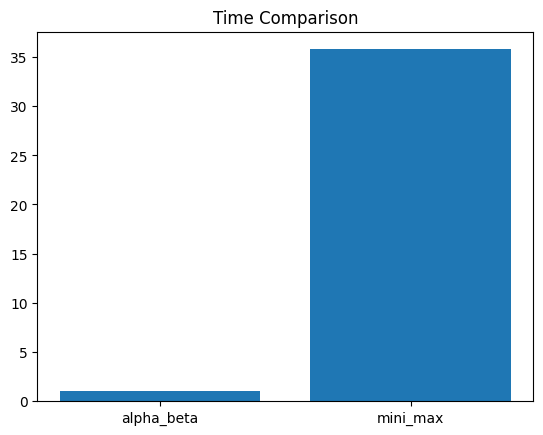

In [15]:
plt.bar(time_dict.keys(), time_dict.values())
plt.title("Time Comparison")
plt.show()